## 1. IMPORT AND READ DATA

In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
df=pd.read_csv('credit_train.csv')

In [9]:
df.shape

(100514, 19)

In [10]:
#check overall data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [10]:
#check null info of each collumn
df.isnull().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [11]:
#find number of duplicate data
df_dup=df.duplicated()
print( df_dup.sum())

10728


In [12]:
#check the change in columns name
df.columns=df.columns.str.replace(' ','')


## 2. CLEAN DATA

In [13]:
# there are 514 null data in loanid and some other colummns, those are blank cells, let's drop it
df1=df.dropna(subset = ['LoanID'])

In [14]:
#check data again
df1.shape

(100000, 19)

In [15]:
#check data info again
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LoanID                     100000 non-null  object 
 1   CustomerID                 100000 non-null  object 
 2   LoanStatus                 100000 non-null  object 
 3   CurrentLoanAmount          100000 non-null  float64
 4   Term                       100000 non-null  object 
 5   CreditScore                80846 non-null   float64
 6   AnnualIncome               80846 non-null   float64
 7   Yearsincurrentjob          95778 non-null   object 
 8   HomeOwnership              100000 non-null  object 
 9   Purpose                    100000 non-null  object 
 10  MonthlyDebt                100000 non-null  float64
 11  YearsofCreditHistory       100000 non-null  float64
 12  Monthssincelastdelinquent  46859 non-null   float64
 13  NumberofOpenAccounts       100

In [16]:
#check null info again
df1.isnull().sum()

LoanID                           0
CustomerID                       0
LoanStatus                       0
CurrentLoanAmount                0
Term                             0
CreditScore                  19154
AnnualIncome                 19154
Yearsincurrentjob             4222
HomeOwnership                    0
Purpose                          0
MonthlyDebt                      0
YearsofCreditHistory             0
Monthssincelastdelinquent    53141
NumberofOpenAccounts             0
NumberofCreditProblems           0
CurrentCreditBalance             0
MaximumOpenCredit                2
Bankruptcies                   204
TaxLiens                        10
dtype: int64

In [17]:
#check duplicated info
df1_dup=df1.duplicated()
print( df1_dup.sum())

10215


In [18]:
#drop them
df1.drop_duplicates(inplace = True)

In [19]:
#check dupe,shape again
df1_dup=df1.duplicated()
print( df1_dup.sum())
df1.shape

0


(89785, 19)

In [20]:

df1['LoanID'].value_counts().sort_values(ascending = False )

387f3adf-a02d-4063-be16-6c9a2b4cf425    2
1373bfdf-ae6d-4fa5-b3e9-73ba60b7868e    2
c5eaf6a1-25e9-42b0-a464-928df0a2d47c    2
e1653c4a-9b73-40ba-8c0b-fd206feb5035    2
b9acffa9-b8fe-4fce-8c0b-8b91af3b5b1f    2
                                       ..
ab57b61a-0157-4a33-b09f-534ec5f14b5e    1
fa53a0d7-5d41-41e1-9b30-8e523d1c653c    1
5594581e-f378-4472-a8d8-e53a84b7498a    1
a30c629f-2ea8-43b3-adbe-39bac0f69da2    1
c63916c6-6d46-47a9-949a-51d09af4414f    1
Name: LoanID, Length: 81999, dtype: int64

In [21]:
#check one of those dup info
df1[df1['LoanID'] == 'c5eaf6a1-25e9-42b0-a464-928df0a2d47c']

,LoanID,CustomerID,LoanStatus,CurrentLoanAmount,Term,CreditScore,AnnualIncome,Yearsincurrentjob,HomeOwnership,Purpose,MonthlyDebt,YearsofCreditHistory,Monthssincelastdelinquent,NumberofOpenAccounts,NumberofCreditProblems,CurrentCreditBalance,MaximumOpenCredit,Bankruptcies,TaxLiens
65477,c5eaf6a1-25e9-42b0-a464-928df0a2d47c,99d7f87d-4b43-4900-abfe-d4c64a0f2247,Fully Paid,155166.0,Short Term,712.0,574275.0,NaN,Own Home,Debt Consolidation,3771.12,25.5,33.0,7.0,0.0,107217.0,226138.0,0.0,0.0
93425,c5eaf6a1-25e9-42b0-a464-928df0a2d47c,99d7f87d-4b43-4900-abfe-d4c64a0f2247,Fully Paid,99999999.0,Short Term,712.0,574275.0,NaN,Own Home,Debt Consolidation,3771.12,25.5,33.0,7.0,0.0,107217.0,226138.0,0.0,0.0


In [22]:
#there is some kind of mistake or typo in currentloanamount of those dup info, which show significant info of 99,999,999. let's drop it
df1=df1[~(df1..duplicated()&(df1['CurrentLoanAmount']==99999999.0))]

In [23]:
#check dupe info again
df1_dup=df1.LoanID.duplicated()
print( df1_dup.sum())
df1.shape

5990


(87989, 19)

In [24]:
df1['LoanID'].value_counts().sort_values(ascending = False )

1a8d05e1-83f1-4efc-9ff6-0101578b1046    2
1eb5f97f-0df1-4582-ae62-500ff3249e8c    2
e95443e7-8c16-4d8c-aa32-4aeb88e83b15    2
da998ea6-d10b-43ef-9cf5-a59e97cdd2e6    2
a5937456-7f51-4557-8b17-3e8c2bb4e517    2
                                       ..
98e1fff9-6575-44fc-bd93-82289758e466    1
8eb43575-f895-4eda-bba0-0a0e55b8bcab    1
268f14e0-d41c-4dc0-876f-36b339f3a794    1
17017095-efe3-46c2-8d3c-c6a368dfc5b9    1
c63916c6-6d46-47a9-949a-51d09af4414f    1
Name: LoanID, Length: 81999, dtype: int64

In [25]:

df1[df1['LoanID'] == 'c5eaf6a1-25e9-42b0-a464-928df0a2d47c']

,LoanID,CustomerID,LoanStatus,CurrentLoanAmount,Term,CreditScore,AnnualIncome,Yearsincurrentjob,HomeOwnership,Purpose,MonthlyDebt,YearsofCreditHistory,Monthssincelastdelinquent,NumberofOpenAccounts,NumberofCreditProblems,CurrentCreditBalance,MaximumOpenCredit,Bankruptcies,TaxLiens
65477,c5eaf6a1-25e9-42b0-a464-928df0a2d47c,99d7f87d-4b43-4900-abfe-d4c64a0f2247,Fully Paid,155166.0,Short Term,712.0,574275.0,NaN,Own Home,Debt Consolidation,3771.12,25.5,33.0,7.0,0.0,107217.0,226138.0,0.0,0.0


In [26]:

df1.Purpose.unique()

array(['Home Improvements', 'Debt Consolidation', 'Buy House', 'other',
       'Business Loan', 'Buy a Car', 'major_purchase', 'Take a Trip',
       'Other', 'small_business', 'Medical Bills', 'wedding', 'vacation',
       'Educational Expenses', 'moving', 'renewable_energy'], dtype=object)

In [27]:
df1.Purpose.value_counts()

Debt Consolidation      69482
Home Improvements        5148
other                    5086
Other                    2806
Business Loan            1335
Buy a Car                1146
Medical Bills             955
Buy House                 564
Take a Trip               476
major_purchase            323
small_business            251
moving                    129
wedding                   102
Educational Expenses       91
vacation                   87
renewable_energy            8
Name: Purpose, dtype: int64

In [28]:
#other show 2 time as typo, let's fix
df1.Purpose=df1.Purpose.str.replace('other','Other')

In [29]:
df1.Purpose.value_counts()

Debt Consolidation      69482
Other                    7892
Home Improvements        5148
Business Loan            1335
Buy a Car                1146
Medical Bills             955
Buy House                 564
Take a Trip               476
major_purchase            323
small_business            251
moving                    129
wedding                   102
Educational Expenses       91
vacation                   87
renewable_energy            8
Name: Purpose, dtype: int64

In [268]:
df1.HomeOwnership.value_counts()

Home Mortgage    42665
Rent             36952
Own Home          8007
HaveMortgage       177
Name: HomeOwnership, dtype: int64

In [269]:
#I think have morgage is  a mis typo from home morgage, let's fix
df1.HomeOwnership=df1.HomeOwnership.str.replace('HaveMortgage','Home Mortgage')

In [270]:
#check again
df1.HomeOwnership.value_counts()

Home Mortgage    42842
Rent             36952
Own Home          8007
Name: HomeOwnership, dtype: int64

In [30]:
df1.CreditScore.median()

730.0

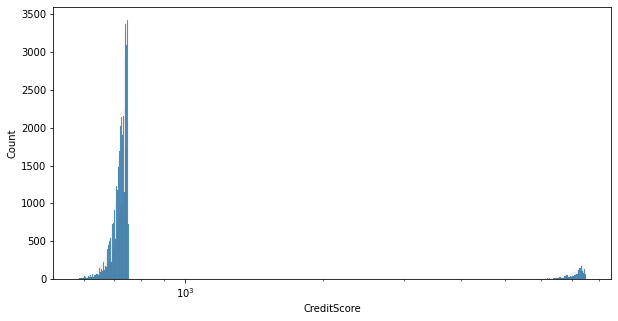

In [31]:
plt.figure(figsize=(10,5))
sns.histplot(df1['CreditScore'], palette='Purples_r',log_scale=True)

In [32]:
#The data looks to be right-skewed , cant use mean in this case
df1['CreditScore']=df1['CreditScore'].fillna(df1['CreditScore'].median())



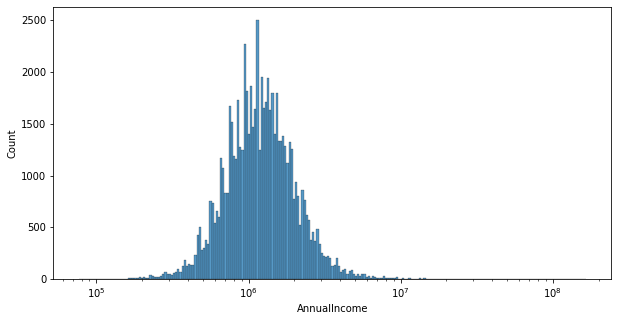

In [33]:
plt.figure(figsize=(10,5))
sns.histplot(df1['AnnualIncome'], palette='Purples_r',log_scale=True)

In [34]:
#use mean here is ok
df['AnnualIncome'].mean()

1378276.559842169

In [35]:
df1['AnnualIncome']=df1['AnnualIncome'].fillna(df1['AnnualIncome'].mean())


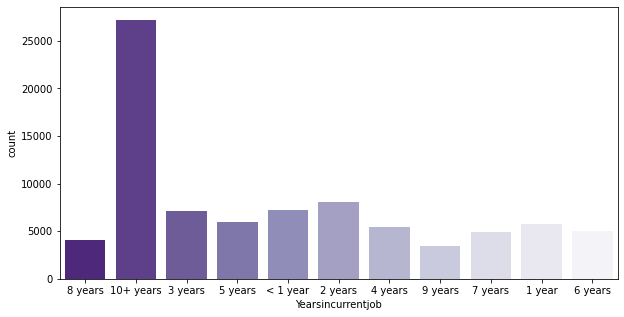

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(df1['Yearsincurrentjob'], palette='Purples_r')


In [37]:
#fill nul with 10+years
df1['Yearsincurrentjob']=df1['Yearsincurrentjob'].fillna('10+ years')

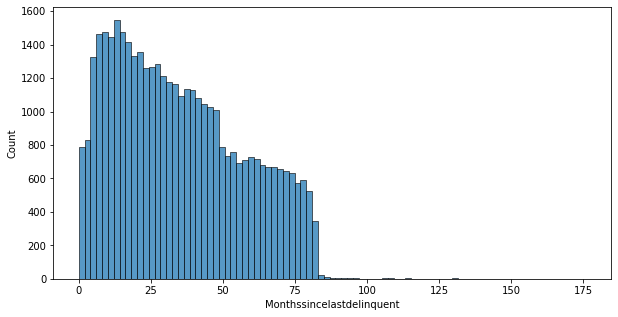

In [38]:
plt.figure(figsize=(10,5))
sns.histplot(df1['Monthssincelastdelinquent'], palette='Purples_r')

In [39]:
#since Monthssincelastdelinquent is the time from cus's latest bad payment so i belive we can put 0 in NaN info
#as the number of null is 47456, cant drop it

df1['Monthssincelastdelinquent']=df1['Monthssincelastdelinquent'].fillna(0)

In [40]:
df1.isnull().sum()

LoanID                         0
CustomerID                     0
LoanStatus                     0
CurrentLoanAmount              0
Term                           0
CreditScore                    0
AnnualIncome                   0
Yearsincurrentjob              0
HomeOwnership                  0
Purpose                        0
MonthlyDebt                    0
YearsofCreditHistory           0
Monthssincelastdelinquent      0
NumberofOpenAccounts           0
NumberofCreditProblems         0
CurrentCreditBalance           0
MaximumOpenCredit              2
Bankruptcies                 186
TaxLiens                       9
dtype: int64

In [41]:
#let drop all other small null info
df1=df1.dropna()

In [42]:
df1.isnull().sum()

LoanID                       0
CustomerID                   0
LoanStatus                   0
CurrentLoanAmount            0
Term                         0
CreditScore                  0
AnnualIncome                 0
Yearsincurrentjob            0
HomeOwnership                0
Purpose                      0
MonthlyDebt                  0
YearsofCreditHistory         0
Monthssincelastdelinquent    0
NumberofOpenAccounts         0
NumberofCreditProblems       0
CurrentCreditBalance         0
MaximumOpenCredit            0
Bankruptcies                 0
TaxLiens                     0
dtype: int64

In [43]:
df1.duplicated().sum()

0

## 3. Analytics

In [ ]:
#check correlation
df1.corr()

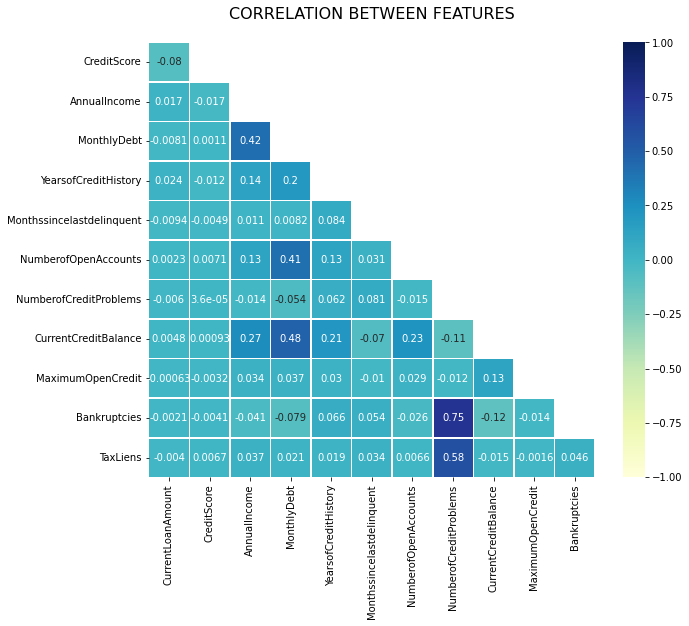

In [261]:
plt.figure(figsize=(10,8))
corr = df1.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
mask = mask[1:, :-1]
corr = corr.iloc[1:,:-1].copy()
sns.heatmap(corr,mask=mask, cmap = 'YlGnBu', annot = True, vmin= -1, vmax= 1, linewidths=.5)
plt.title('CORRELATION BETWEEN FEATURES\n', fontsize=16);

In [273]:
#select top 10 corr

c1 = df1.corr()
c1= c1.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool))
c2 = c1.unstack().reset_index()
c2.columns =['VAR1','VAR2','Correlation']
c2.dropna(subset = ["Correlation"], inplace = True)
c2["Correlation"]=c2["Correlation"].abs() 
c2.sort_values(by='Correlation', ascending=False, inplace=True) 
c2.head(10)

,VAR1,VAR2,Correlation
127,Bankruptcies,NumberofCreditProblems,0.753917
139,TaxLiens,NumberofCreditProblems,0.579917
99,CurrentCreditBalance,MonthlyDebt,0.476694
38,MonthlyDebt,AnnualIncome,0.418605
75,NumberofOpenAccounts,MonthlyDebt,0.409278
98,CurrentCreditBalance,AnnualIncome,0.268953
102,CurrentCreditBalance,NumberofOpenAccounts,0.227193
100,CurrentCreditBalance,YearsofCreditHistory,0.209070
51,YearsofCreditHistory,MonthlyDebt,0.195478
50,YearsofCreditHistory,AnnualIncome,0.136951


*Comment
- 

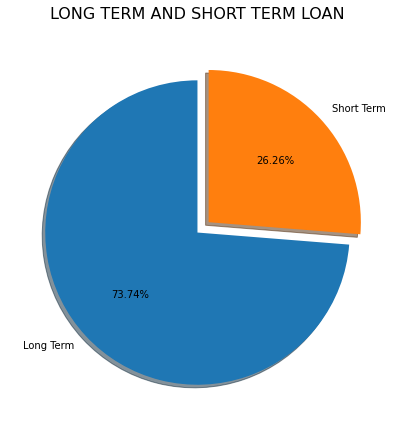

In [59]:
plt.figure(figsize=(7,7))
labels = 'Long Term','Short Term'
sizes=[(df1['Term'].value_counts()['Short Term']),(df1['Term'].value_counts()['Long Term'])]
explode = (0, 0.1)  
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',shadow=True, startangle=90)
plt.title('LONG TERM AND SHORT TERM LOAN\n', fontsize=16)
plt.show()


*Comment: the data we have here shows that most of the loan are long term, which is 73.74% of total

In [ ]:
df2=df1.loc[(df1['CreditScore']<5000)&(df1['CreditScore']>730)]
df2['CreditScore'].value_counts()

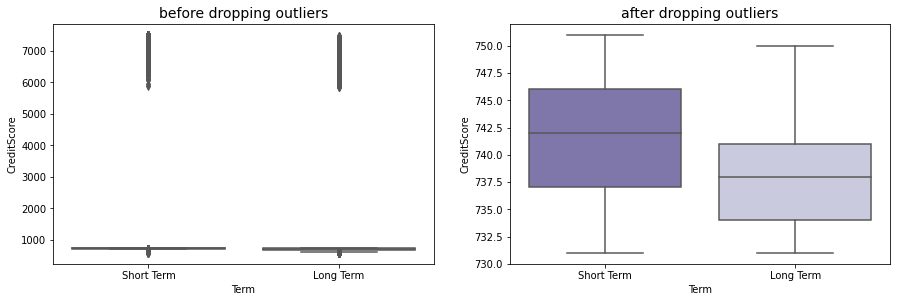

In [123]:
#terms and creditscore
plt.figure(figsize = [15,15])
plt.subplot(3,2,1)
sns.boxplot(x=df1['Term'],y=df1['CreditScore'],
            palette='Purples_r', data = df1.sort_values('CreditScore',ascending=False));
plt.title('before dropping outliers',fontsize = 14 )            


plt.subplot(3,2,2)
sns.boxplot(x=df1['Term'],y=df2['CreditScore'],
            palette='Purples_r', data = df2.sort_values('CreditScore',ascending=False));
plt.title('after dropping outliers',fontsize = 14 )            

plt.show()

*Comment:
- There is a significant amount of outlier credit score >5000 and <1000 , so we will check again exclude them.
- boxplot shows that median of short term credit score is at 742 and higher than long term which is 3=735.5
- when the credit score is even, the longterm are more likeky rightskew, which means most of longterm loan has low credit score

In [ ]:

print(np.where((df1['CurrentLoanAmount']>60000)& (df1['CurrentLoanAmount']<65000)))

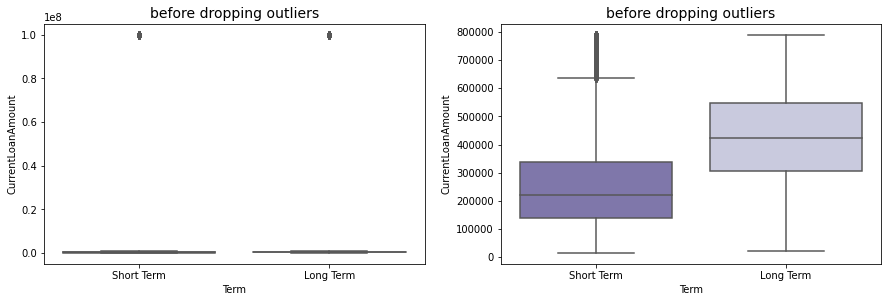

In [152]:
#term and current loan amount

plt.figure(figsize = [15,15])
plt.subplot(3,2,1)
sns.boxplot(x=df1['Term'],y=df1['CurrentLoanAmount'],
            palette='Purples_r', data = df1.sort_values('CurrentLoanAmount',ascending=False));
plt.title('before dropping outliers',fontsize = 14 )


plt.subplot(3,2,2)
sns.boxplot(x=df1['Term'],y=df3['CurrentLoanAmount'],
            palette='Purples_r', data = df3.sort_values('CurrentLoanAmount',ascending=False));
plt.title('after dropping outliers',fontsize = 14 )
plt.show()

*Comment:
- as expected, most of loans are long term, current loan amount most likely they are even
- on the other hand, short term loan amount are right skew and median is closer to Q1

In [ ]:
df4=df1.loc[(df1['AnnualIncome']>0)& (df1['AnnualIncome']<1300000)]
df4['AnnualIncome'].sort_values(ascending = False).value_counts()

Text(0.5, 1.0, 'after dropping outliers')

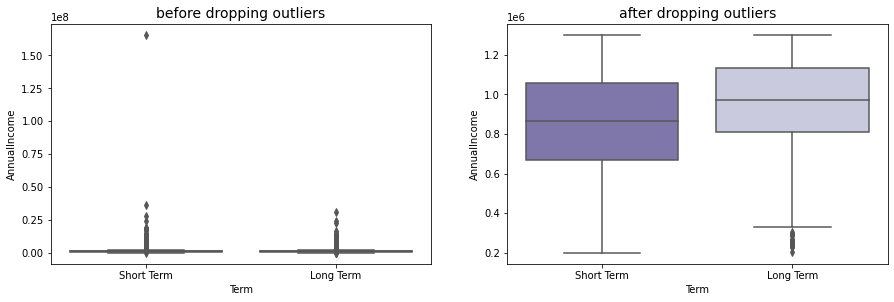

In [207]:
#term and annual income
plt.figure(figsize = [15,15])
plt.subplot(3,2,1)
sns.boxplot(x=df1['Term'],y=df1['AnnualIncome'],
            palette='Purples_r', data = df1.sort_values('AnnualIncome',ascending=False));
plt.title('before dropping outliers',fontsize = 14 )

plt.subplot(3,2,2)
sns.boxplot(x=df1['Term'],y=df4['AnnualIncome'],
            palette='Purples_r', data = df4.sort_values('AnnualIncome',ascending=False));
plt.title('after dropping outliers',fontsize = 14 )

*Comment:
- customers with more annual income prefer loan in long term as the box is left skew, but also there are some lower income choose long term but most of them prefer short term

In [232]:
df5=df1.loc[(df1['MonthlyDebt']>00000)& (df1['MonthlyDebt']<45000)]
df5['MonthlyDebt'].sort_values(ascending = False).value_counts()

13359.85    8
14726.52    7
15903.00    7
10647.98    7
17132.11    6
           ..
16275.59    1
16275.40    1
28382.58    1
16274.64    1
7.41        1
Name: MonthlyDebt, Length: 63050, dtype: int64

Text(0.5, 1.0, 'before dropping outliers')

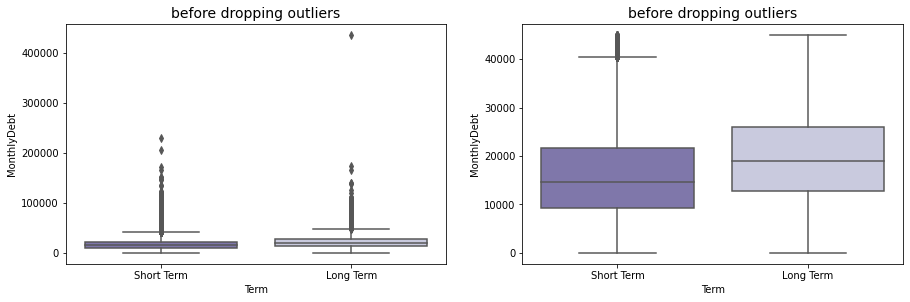

In [233]:
#term and monthly debt
plt.figure(figsize = [15,15])
plt.subplot(3,2,1)
sns.boxplot(x=df1['Term'],y=df1['MonthlyDebt'],
            palette='Purples_r', data = df1.sort_values('MonthlyDebt',ascending=False));
plt.title('before dropping outliers',fontsize = 14 )

plt.subplot(3,2,2)
sns.boxplot(x=df1['Term'],y=df5['MonthlyDebt'],
            palette='Purples_r', data = df5.sort_values('MonthlyDebt',ascending=False));
plt.title('after dropping outliers',fontsize = 14 )


*Comment:
-boxes of both long and short term monthlydebt are more right skew, short term are more than long term 

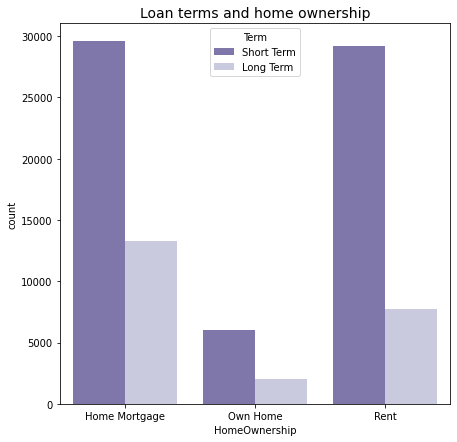

In [271]:
#term and house own
plt.figure(figsize = [7,7])
sns.countplot(x='HomeOwnership', hue='Term', data=df1,palette = 'Purples_r')
plt.title('Loan terms and home ownership',fontsize=14)
plt.show()

*Comment:
-most of customers dont own house, most short term customers have home mortgage or rent house than long term

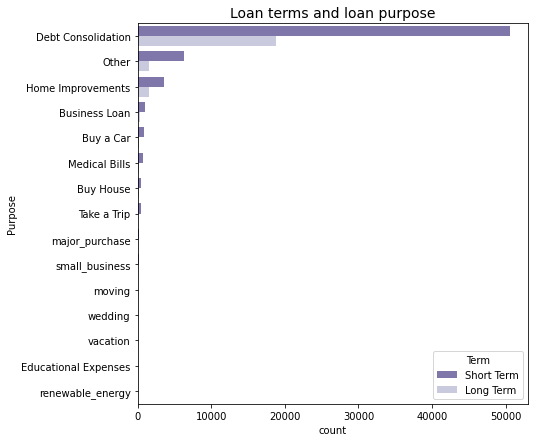

In [248]:
#term and loan purpose
plt.figure(figsize = [7,7])
sns.countplot(y='Purpose', hue='Term', data=df1,palette = 'Purples_r',order= df1['Purpose'].value_counts().index)
plt.title('Loan terms and loan purpose',fontsize=14)
plt.legend(title="Term", loc="lower right")
plt.show()

*Comment:
- Loan products prefered are  debt consolidation,then home improvement, business loan, some car loans and other loans.
-short term loans show significant mounts of requires
